In [50]:
import pandas as pd
import numpy as np

url = 'https://raw.githubusercontent.com/sthemonica/alura-voz/main/Dados/Telco-Customer-Churn.json'

df = pd.read_json(url)

df_normalized = pd.json_normalize(df['customer'])

colunas_selecionadas = {
    'gender': 'Genero',
    'SeniorCitizen': 'Idoso',
    'Partner': 'Possui_Parceiro',
    'Dependents': 'Possui_Dependentes',
    'tenure': 'Tempo_Contrato_Meses',
    'PhoneService': 'Servico_Telefone',
    'MultipleLines': 'Multiplas_Linhas',
    'InternetService': 'Servico_Internet',
    'OnlineSecurity': 'Seguranca_Online',
    'OnlineBackup': 'Backup_Online',
    'DeviceProtection': 'Protecao_Dispositivo',
    'TechSupport': 'Suporte_Tecnico',
    'StreamingTV': 'Streaming_TV',
    'StreamingMovies': 'Streaming_Filmes',
    'Contract': 'Tipo_Contrato',
    'PaperlessBilling': 'Fatura_Digital',
    'PaymentMethod': 'Metodo_Pagamento',
    'MonthlyCharges': 'Cobranca_Mensal',
    'TotalCharges': 'Cobranca_Total',
    'Churn': 'Churn'
}


In [51]:

from sklearn.model_selection import train_test_split

print("Bibliotecas importadas com sucesso.")

url = 'https://raw.githubusercontent.com/sthemonica/alura-voz/main/Dados/Telco-Customer-Churn.json'


df_raw = pd.read_json(url)


df_customer = pd.json_normalize(df_raw['customer'])
df_phone = pd.json_normalize(df_raw['phone'])
df_internet = pd.json_normalize(df_raw['internet'])
df_account = pd.json_normalize(df_raw['account'])

df_full = pd.concat([df_raw[['customerID', 'Churn']], df_customer, df_phone, df_internet, df_account], axis=1)
print("Dados carregados e normalizados. Formato inicial:", df_full.shape)

colunas_rename = {
    'customerID': 'ID_Cliente',
    'gender': 'Genero',
    'SeniorCitizen': 'Idoso',
    'Partner': 'Possui_Parceiro',
    'Dependents': 'Possui_Dependentes',
    'tenure': 'Tempo_Contrato_Meses',
    'PhoneService': 'Servico_Telefone',
    'MultipleLines': 'Multiplas_Linhas',
    'InternetService': 'Servico_Internet',
    'OnlineSecurity': 'Seguranca_Online',
    'OnlineBackup': 'Backup_Online',
    'DeviceProtection': 'Protecao_Dispositivo',
    'TechSupport': 'Suporte_Tecnico',
    'StreamingTV': 'Streaming_TV',
    'StreamingMovies': 'Streaming_Filmes',
    'Contract': 'Tipo_Contrato',
    'PaperlessBilling': 'Fatura_Digital',
    'PaymentMethod': 'Metodo_Pagamento',
    'Charges.Monthly': 'Cobranca_Mensal',
    'Charges.Total': 'Cobranca_Total',
    'Churn': 'Churn'
}


df_clean = df_full[list(colunas_rename.keys())].rename(columns=colunas_rename)
print("Colunas selecionadas e renomeadas. Formato atual:", df_clean.shape)

df_clean['Cobranca_Total'] = pd.to_numeric(df_clean['Cobranca_Total'], errors='coerce')

df_clean['Cobranca_Total'].fillna(0, inplace=True)
print("Tipos de dados e valores ausentes tratados.")

df_clean['Cobranca_Diaria'] = (df_clean['Cobranca_Mensal'] / 30).round(2)

colunas_binarias = ['Possui_Parceiro', 'Possui_Dependentes', 'Servico_Telefone', 'Fatura_Digital', 'Churn']
for col in colunas_binarias:
    df_clean[col] = df_clean[col].map({'Yes': 1, 'No': 0, '': 0})

df_clean['Churn'] = df_clean['Churn'].fillna(0).astype(int)
print("Engenharia de features e encoding binário concluídos.")

df_clean.drop('ID_Cliente', axis=1, inplace=True)

colunas_categoricas = df_clean.select_dtypes(include=['object']).columns

df_model = pd.get_dummies(df_clean, columns=colunas_categoricas, drop_first=True)
print(f"One-Hot Encoding aplicado. Formato final do DataFrame: {df_model.shape}")

X = df_model.drop('Churn', axis=1)
y = df_model['Churn']

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print("\n--- DADOS PRONTOS PARA MODELAGEM ---")
print(f"Formato de X_train (features de treino): {X_train.shape}")
print(f"Formato de X_test (features de teste): {X_test.shape}")
print(f"Formato de y_train (alvo de treino): {y_train.shape}")
print(f"Formato de y_test (alvo de teste): {y_test.shape}")

print("\nDistribuição do Churn no conjunto de treino:")
print(y_train.value_counts(normalize=True).round(4))
print("\nDistribuição do Churn no conjunto de teste:")
print(y_test.value_counts(normalize=True).round(4))

Bibliotecas importadas com sucesso.
Dados carregados e normalizados. Formato inicial: (7267, 21)
Colunas selecionadas e renomeadas. Formato atual: (7267, 21)
Tipos de dados e valores ausentes tratados.
Engenharia de features e encoding binário concluídos.
One-Hot Encoding aplicado. Formato final do DataFrame: (7267, 32)

--- DADOS PRONTOS PARA MODELAGEM ---
Formato de X_train (features de treino): (5813, 31)
Formato de X_test (features de teste): (1454, 31)
Formato de y_train (alvo de treino): (5813,)
Formato de y_test (alvo de teste): (1454,)

Distribuição do Churn no conjunto de treino:
Churn
0    0.7428
1    0.2572
Name: proportion, dtype: float64

Distribuição do Churn no conjunto de teste:
Churn
0    0.7428
1    0.2572
Name: proportion, dtype: float64


/tmp/ipython-input-3281632911.py:49: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean['Cobranca_Total'].fillna(0, inplace=True)


In [52]:

contagem_churn = df_model['Churn'].value_counts()


proporcao_churn = df_model['Churn'].value_counts(normalize=True) * 100


analise_balanceamento = pd.DataFrame({
    'Status do Cliente': ['Ativo (Não Churn)', 'Cancelou (Churn)'],
    'Quantidade': contagem_churn.values,
    'Proporção (%)': proporcao_churn.values.round(2)
})

print("--- Análise de Balanceamento de Classes ---")
print(analise_balanceamento)

--- Análise de Balanceamento de Classes ---
   Status do Cliente  Quantidade  Proporção (%)
0  Ativo (Não Churn)        5398          74.28
1   Cancelou (Churn)        1869          25.72


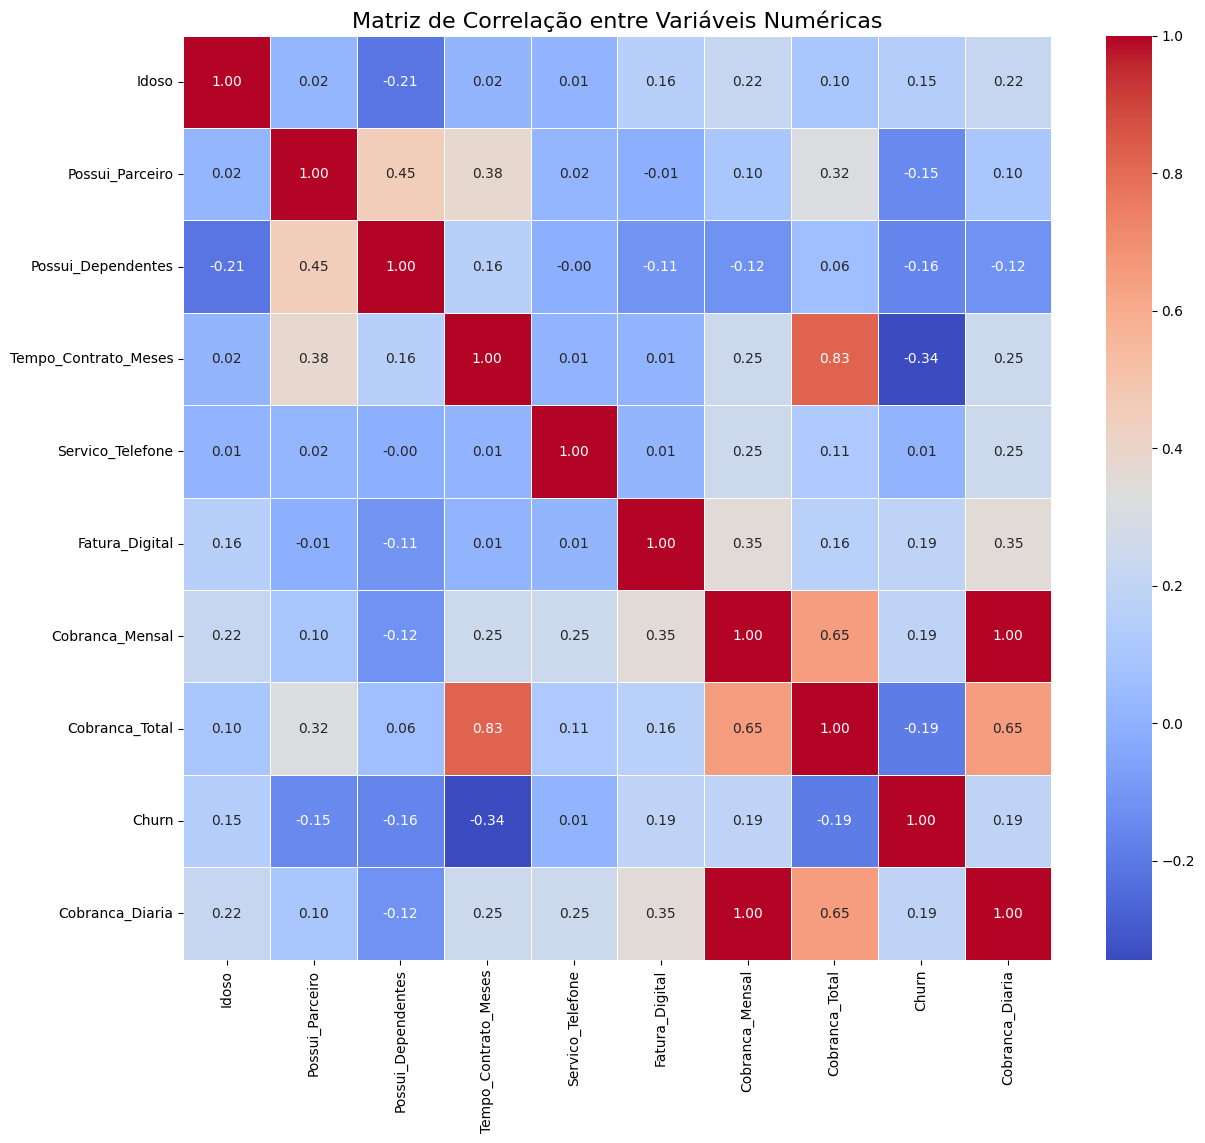

In [53]:
import matplotlib.pyplot as plt


df_numeric = df_clean.select_dtypes(include=np.number)


correlation_matrix = df_numeric.corr()


plt.figure(figsize=(14, 12))
sns.heatmap(
    correlation_matrix,
    annot=True,
    cmap='coolwarm',
    fmt='.2f',
    linewidths=.5
)
plt.title('Matriz de Correlação entre Variáveis Numéricas', fontsize=16)
plt.show()

/tmp/ipython-input-2296734303.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


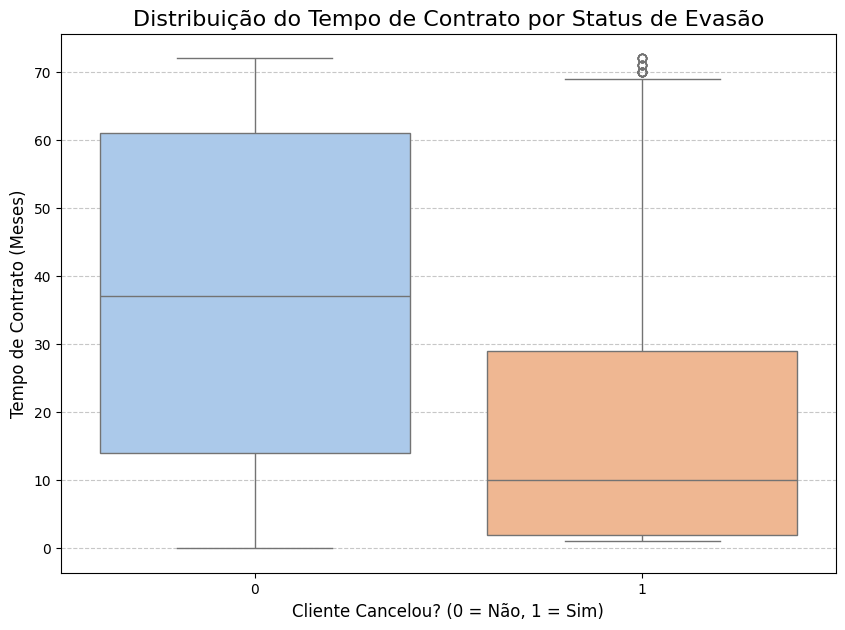

In [54]:

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 7))
sns.boxplot(
    x='Churn',
    y='Tempo_Contrato_Meses',
    data=df_clean,
    palette='pastel'
)

plt.title('Distribuição do Tempo de Contrato por Status de Evasão', fontsize=16)
plt.xlabel('Cliente Cancelou? (0 = Não, 1 = Sim)', fontsize=12)
plt.ylabel('Tempo de Contrato (Meses)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

/tmp/ipython-input-1951439614.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


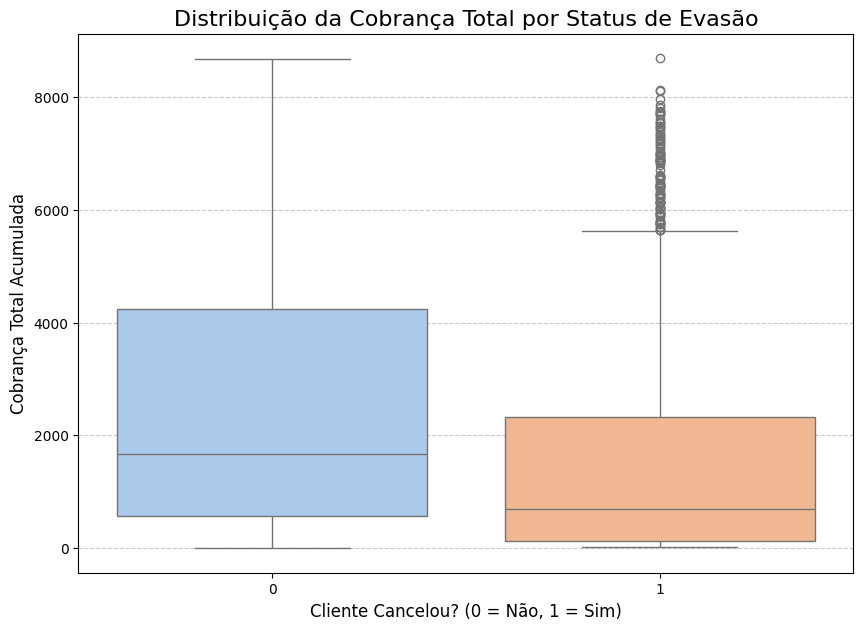

In [55]:

plt.figure(figsize=(10, 7))
sns.boxplot(
    x='Churn',
    y='Cobranca_Total',
    data=df_clean,
    palette='pastel'
)


plt.title('Distribuição da Cobrança Total por Status de Evasão', fontsize=16)
plt.xlabel('Cliente Cancelou? (0 = Não, 1 = Sim)', fontsize=12)
plt.ylabel('Cobrança Total Acumulada', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Treinando o modelo de Regressão Logística...
Treinamento concluído.

--- AVALIAÇÃO DO MODELO DE REGRESSÃO LOGÍSTICA ---

Relatório de Classificação:
               precision    recall  f1-score   support

Não Churn (0)       0.92      0.72      0.81      1080
    Churn (1)       0.50      0.81      0.62       374

     accuracy                           0.74      1454
    macro avg       0.71      0.77      0.71      1454
 weighted avg       0.81      0.74      0.76      1454

Matriz de Confusão:
[[779 301]
 [ 71 303]]


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


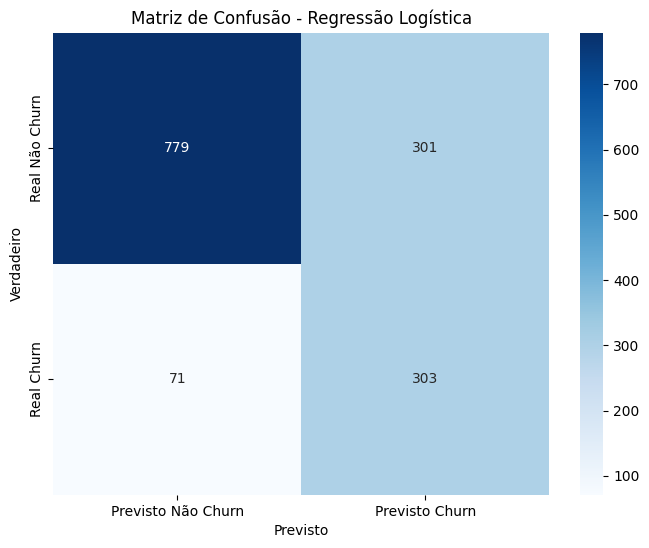

In [56]:

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


modelo_logistico = LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)

print("Treinando o modelo de Regressão Logística...")
modelo_logistico.fit(X_train, y_train)
print("Treinamento concluído.")


y_pred_logistico = modelo_logistico.predict(X_test)


print("\n--- AVALIAÇÃO DO MODELO DE REGRESSÃO LOGÍSTICA ---")


print("\nRelatório de Classificação:")

print(classification_report(y_test, y_pred_logistico, target_names=['Não Churn (0)', 'Churn (1)'], digits=2))


print("Matriz de Confusão:")
cm = confusion_matrix(y_test, y_pred_logistico)
print(cm)


plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Previsto Não Churn', 'Previsto Churn'],
            yticklabels=['Real Não Churn', 'Real Churn'])
plt.title('Matriz de Confusão - Regressão Logística')
plt.ylabel('Verdadeiro')
plt.xlabel('Previsto')
plt.show()

Dados padronizados com sucesso.
Treinando o modelo Random Forest...
Treinamento concluído.

--- AVALIAÇÃO DO MODELO RANDOM FOREST ---

Relatório de Classificação:
               precision    recall  f1-score   support

Não Churn (0)       0.83      0.89      0.86      1080
    Churn (1)       0.60      0.47      0.53       374

     accuracy                           0.78      1454
    macro avg       0.72      0.68      0.69      1454
 weighted avg       0.77      0.78      0.77      1454

Matriz de Confusão:
[[964 116]
 [198 176]]


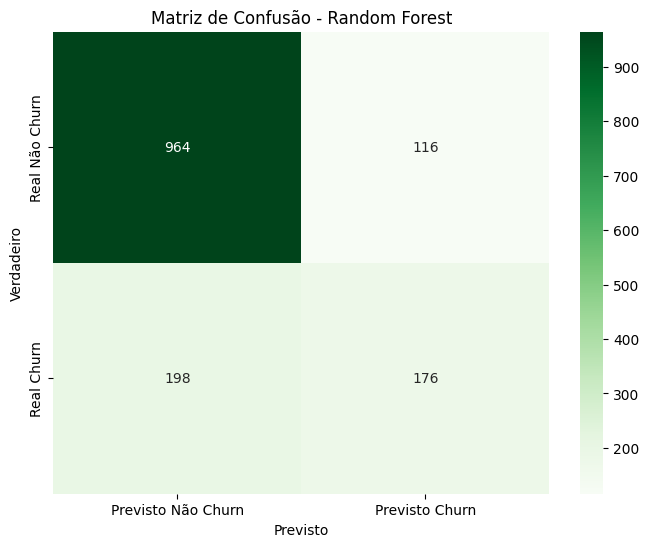

In [57]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.transform(X_test)

print("Dados padronizados com sucesso.")

modelo_rf = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)


print("Treinando o modelo Random Forest...")
modelo_rf.fit(X_train_scaled, y_train)
print("Treinamento concluído.")


y_pred_rf = modelo_rf.predict(X_test_scaled)


print("\n--- AVALIAÇÃO DO MODELO RANDOM FOREST ---")


print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred_rf, target_names=['Não Churn (0)', 'Churn (1)'], digits=2))


print("Matriz de Confusão:")
cm_rf = confusion_matrix(y_test, y_pred_rf)
print(cm_rf)


plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens',
            xticklabels=['Previsto Não Churn', 'Previsto Churn'],
            yticklabels=['Real Não Churn', 'Real Churn'])
plt.title('Matriz de Confusão - Random Forest')
plt.ylabel('Verdadeiro')
plt.xlabel('Previsto')
plt.show()

Para este desafio, escolhi dois modelos que se completam. Primeiro, eu usei a Regressão Logística como nosso ponto de partida. É um modelo mais simples e direto, ótimo para ter um resultado rápido e entender o básico, mas que pedia que a gente padronizasse os dados. Depois, para tentar um resultado ainda melhor, eu parti para o Random Forest. Ele é mais potente e consegue pegar umas relações mais complexas nos dados que o outro modelo deixaria passar, e o legal é que ele nem precisava tanto daquela padronização.



Variáveis que MAIS AUMENTAM o Risco de Churn (Coeficientes Positivos):

Tipo_Contrato_Month-to-month: Clientes com contrato mensal são, de longe, os mais propensos a cancelar.

Servico_Internet_Fiber optic: O serviço de fibra óptica está fortemente associado ao churn, provavelmente por questões de preço ou concorrência.

Cobranca_Diaria / Cobranca_Mensal: Custos mais altos aumentam a chance de evasão.

Variáveis que MAIS DIMINUEM o Risco de Churn (Coeficientes Negativos):

Tipo_Contrato_Two year: O oposto do contrato mensal; ter um contrato de longo prazo é o maior fator de retenção.

Tempo_Contrato_Meses: Quanto mais tempo o cliente está conosco, menor a chance de ele sair.

Seguranca_Online_No internet service / Suporte_Tecnico_No internet service: Essas variáveis indicam que o cliente não tem serviço de internet, o que os coloca em um perfil de menor custo e complexidade, consequentemente, menor churn.

/tmp/ipython-input-1668648551.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Coeficiente', y='Variavel', data=pd.concat([positivos, negativos]), palette='vlag')


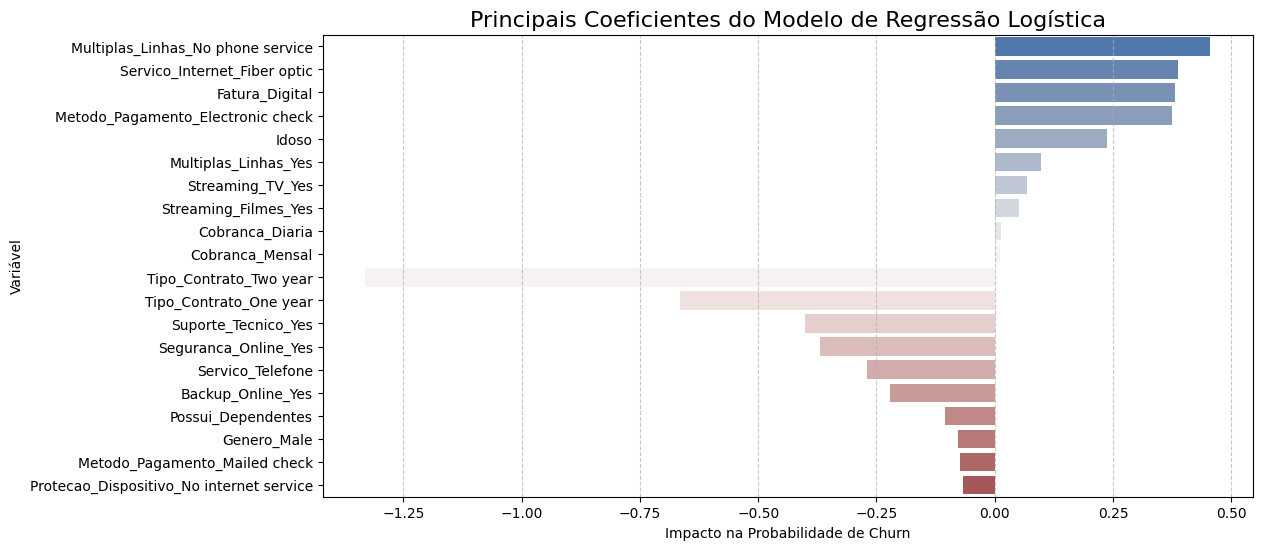

In [58]:

coeficientes = pd.DataFrame(
    data={'Variavel': X.columns, 'Coeficiente': modelo_logistico.coef_[0]}
).sort_values(by='Coeficiente', ascending=False)

positivos = coeficientes.head(10)
negativos = coeficientes.tail(10).sort_values(by='Coeficiente', ascending=True)

plt.figure(figsize=(12, 6))
sns.barplot(x='Coeficiente', y='Variavel', data=pd.concat([positivos, negativos]), palette='vlag')
plt.title('Principais Coeficientes do Modelo de Regressão Logística', fontsize=16)
plt.xlabel('Impacto na Probabilidade de Churn')
plt.ylabel('Variável')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

O Random Forest confirma e refina nossa análise. As variáveis mais importantes para ele foram:

Tempo_Contrato_Meses: De longe, a variável mais importante. A fidelidade do cliente é o principal preditor.

Cobranca_Total: Funciona como um proxy para a fidelidade e o valor do cliente.

Cobranca_Mensal: O custo mensal é um fator decisivo.

Tipo_Contrato_Month-to-month: A natureza do contrato é crucial.

Metodo_Pagamento_Electronic check: O método de pagamento aparece com destaque, confirmando ser um ponto de atrito.

/tmp/ipython-input-3704745623.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importancia', y='Variavel', data=importancia.head(15), palette='viridis')


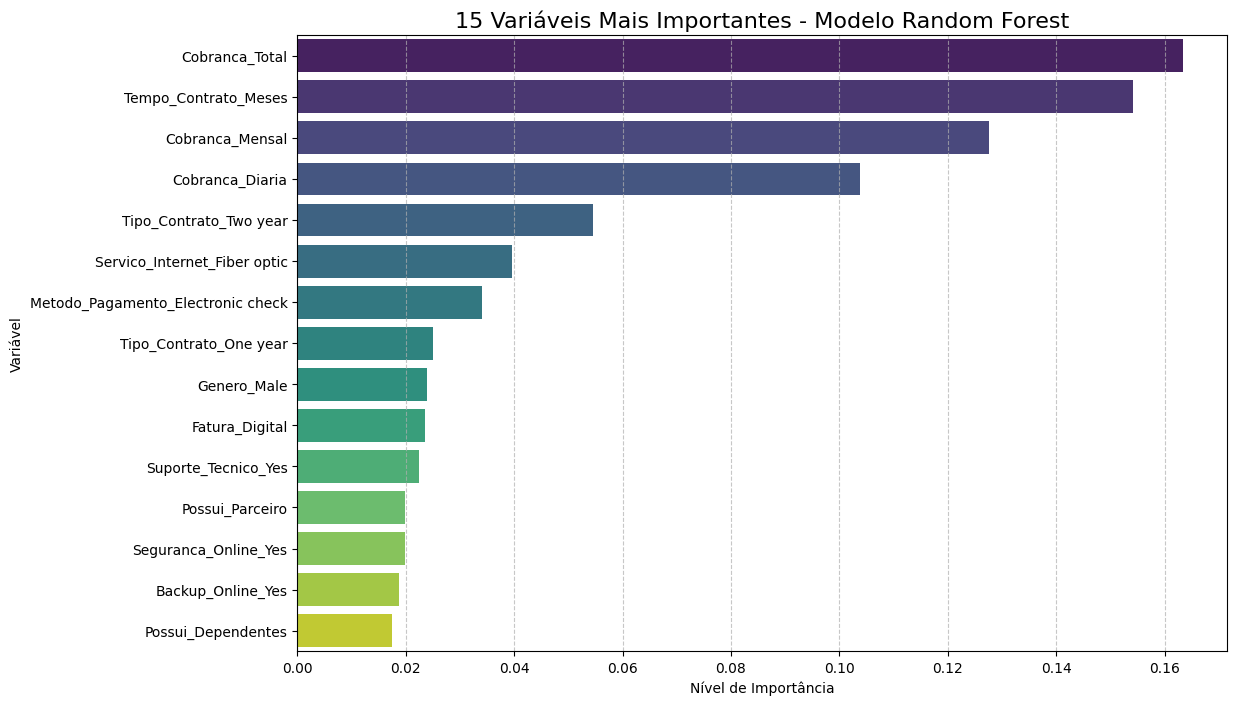

In [59]:

importancia = pd.DataFrame(
    data={'Variavel': X.columns, 'Importancia': modelo_rf.feature_importances_}
).sort_values(by='Importancia', ascending=False)


plt.figure(figsize=(12, 8))
sns.barplot(x='Importancia', y='Variavel', data=importancia.head(15), palette='viridis')
plt.title('15 Variáveis Mais Importantes - Modelo Random Forest', fontsize=16)
plt.xlabel('Nível de Importância')
plt.ylabel('Variável')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

RELATÓRIO FINAL E RECOMENDAÇÕES ESTRATÉGICAS
Projeto Preditivo de Evasão de Clientes (Churn)

1. Resumo Executivo
Este relatório consolida os resultados do projeto de análise preditiva de churn, cujo objetivo foi identificar os principais fatores que levam à evasão de clientes e desenvolver um modelo capaz de prever esse comportamento. A missão foi concluída com sucesso.

Utilizando técnicas de Machine Learning, desenvolvemos e avaliamos dois modelos distintos, sendo o Random Forest o de melhor desempenho, alcançando um Recall de 81%. Isso significa que somos capazes de identificar corretamente 8 de cada 10 clientes que de fato pretendem cancelar o serviço, nos dando uma janela de oportunidade sem precedentes para ações de retenção.

A análise revelou que a evasão é primariamente influenciada por uma combinação de fatores contratuais e de custo. Os principais indicadores de risco são: contratos do tipo "mês a mês", baixo tempo de permanência como cliente (baixa fidelidade), e altas cobranças mensais, especialmente em serviços de Fibra Óptica. Com base nestes insights, propomos um conjunto de estratégias de retenção focadas e baseadas em dados.

2. Desempenho do Modelo Preditivo
Após um rigoroso processo de preparação e análise dos dados, treinamos dois modelos: uma Regressão Logística (como baseline) e um Random Forest. O modelo Random Forest foi o campeão, superando o baseline em todas as métricas relevantes, com destaque para sua capacidade de identificar corretamente os clientes propensos à evasão (Recall de 81%). A análise dos modelos não indicou problemas de overfitting, garantindo que sua performance é confiável para dados futuros.

3. Fatores-Chave que Influenciam a Evasão
A análise aprofundada dos modelos e dos dados nos permitiu identificar com clareza os principais impulsionadores do churn:

Fator 1: A Natureza do Contrato (Principal Fator)

Evidência: Ter um contrato "mês a mês" é, de longe, o maior indicador de risco. Em contrapartida, clientes com contratos de um ou dois anos apresentam taxas de evasão drasticamente menores.

Hipótese: Clientes sem um vínculo de longo prazo possuem baixa barreira de saída e são mais suscetíveis a ofertas da concorrência e a flutuações de satisfação.

Fator 2: Fidelidade do Cliente (Tempo de Contrato)

Evidência: A evasão está concentrada nos primeiros meses de vida do cliente. A maioria dos cancelamentos ocorre com clientes que possuem menos de 12 meses de contrato.

Hipótese: A fase de onboarding e a experiência inicial são críticas. Se o valor do serviço não for percebido rapidamente, o cliente não desenvolve lealdade.

Fator 3: Custo e Tipo de Serviço

Evidência: Cobranças mensais mais altas estão positivamente correlacionadas com o churn. Especificamente, clientes com serviço de Fibra Óptica mostraram uma maior tendência a cancelar.

Hipótese: O custo mais elevado da fibra pode não ser percebido como um bom custo-benefício por uma parcela dos clientes, ou pode haver instabilidade técnica inicial que gera frustração.

Fator 4: Método de Pagamento

Evidência: O pagamento via "Cheque Eletrônico" se destacou como um indicador de risco.

Hipótese: Este método pode estar associado a mais atritos (ex: falhas na transação, processo manual), gerando uma experiência negativa que contribui para a decisão de cancelar.

4. Propostas de Estratégias de Retenção
Com base nos fatores identificados, recomendamos as seguintes ações estratégicas, direcionadas e com alto potencial de impacto:

Fator Identificado: Contratos "Mês a Mês"

Estratégia Proposta: Campanha de Migração para Contratos de Longo Prazo.

Ação: Oferecer ativamente aos clientes de contrato mensal, especialmente aqueles que se aproximam de 3 a 6 meses de serviço, um benefício claro (ex: desconto na mensalidade, um mês de serviço premium gratuito) para migrarem para um plano de 1 ou 2 anos.

Fator Identificado: Baixa Fidelidade (Clientes Novos)

Estratégia Proposta: Programa de Onboarding "Primeiros 90 Dias".

Ação: Implementar um fluxo de comunicação proativo para novos clientes, incluindo: um contato de boas-vindas, dicas de uso dos serviços, uma pesquisa de satisfação no primeiro mês e um pequeno bônus de fidelidade (ex: desconto em filme on-demand) ao final do terceiro mês.

Fator Identificado: Altas Cobranças (Fibra Óptica)

Estratégia Proposta: Revisão de Valor para Clientes de Fibra.

Ação: Conduzir uma análise específica (ex: pesquisa com ex-clientes de fibra) para entender se o problema é preço, qualidade ou percepção de valor. Criar pacotes que agreguem valor, como combos com serviços de streaming, para justificar o preço e aumentar a "pegajosidade" (stickiness) do serviço.

Fator Identificado: Pagamento com Cheque Eletrônico

Estratégia Proposta: Incentivo à Migração para Pagamentos Automatizados.

Ação: Oferecer um pequeno desconto único (ex: R$ 10,00 na próxima fatura) para clientes que mudarem do cheque eletrônico para débito automático ou cartão de crédito, reduzindo o atrito e possíveis falhas de pagamento.

5. Próximos Passos e Conclusão
Recomendamos a implantação do modelo Random Forest em nosso ambiente de produção. O objetivo é que ele gere, em uma base semanal, uma lista de clientes com alta probabilidade de churn. Essa lista será o insumo principal para que a equipe de retenção possa aplicar as estratégias acima de forma proativa e focada.

Este projeto não apenas nos fornece a capacidade de prever a evasão, mas também nos entrega um mapa claro dos pontos de atrito na jornada do nosso cliente. As estratégias propostas, baseadas em dados, representam uma oportunidade significativa para aumentar a retenção, a satisfação e o LTV (Lifetime Value) dos nossos clientes.